In [1]:
import biobalm
import ginsim
import biolqm

In [31]:
import numpy as np

import biobalm.succession_diagram


sd = biobalm.succession_diagram.SuccessionDiagram.from_file('../calzone_cellfate.bnet')
sd.build()
test = sd.summary()


In [ ]:
test

In [33]:
import pandas as pd
import re

# Extract state order
state_order_match = re.search(r"State order:\s*(.*)", test)
state_order = state_order_match.group(1).split(", ") if state_order_match else []

# Extract binary vectors (minimal trap space & motif avoidance)
binary_vectors = re.findall(r"(?:minimal trap space|motif avoidance in) ([01*]+)", test)
binary_vectors += re.findall(r"\.\.\.+([01*]+)", test)

# Convert to DataFrame
df = pd.DataFrame([list(vec) for vec in binary_vectors], columns=state_order)

df

,ATP,Apoptosis,BAX,BCL2,CASP3,CASP8,Cyt_c,DISC_FAS,DISC_TNF,FADD,FASL,IKK,MOMP,MPT,NFkB,NonACD,RIP1,RIP1K,RIP1ub,ROS,SMAC,Survival,TNF,TNFR,XIAP,apoptosome,cFLIP,cIAP
0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
1,*,*,*,0,*,*,*,0,0,0,0,0,*,*,0,*,0,0,0,*,*,0,0,0,0,*,0,0
2,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1
4,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
71,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
73,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1]:
import pystablemotifs as sm
import pyboolnet
import pystablemotifs.export as ex
import networkx as nx

In [136]:
from pyboolnet.file_exchange import bnet2primes, primes2bnet
from pyboolnet.prime_implicants import find_constants, create_variables
from pyboolnet.repository import get_primes

primes = bnet2primes("/home/spankaew/Git/astrologics/models/herault_hematopoiesis.bnet")

In [137]:
sm.format.pretty_print_prime_rules(primes)

Bclaf1* = Myc
CDK46CycD* = Myc | Bclaf1
CIPKIP* = Junb
Cebpa* = !Ikzf1 & Spi1 | Gata2 & !Ikzf1
Egr1* = Gata2 & Junb
Fli1* = Gata1 & !Klf1 | Junb
Gata1* = Gata1 & !Ikzf1 & !Spi1 | Gata2 & !Spi1 | Fli1
Gata2* = Egr1 & !Gata1 & !Spi1 & !Zfpm1 | !Gata1 & Gata2 & !Zfpm1
Ikzf1* = Gata2
Junb* = Myc | Egr1
Klf1* = !Fli1 & Gata1
Myc* = Bclaf1 & Cebpa
Spi1* = Cebpa & !Gata1 & !Gata2 | !Gata1 & Spi1
Tal1* = Gata1 & !Spi1
Zfpm1* = Gata1


In [138]:
max_simulate_size = 100
ar = sm.AttractorRepertoire.from_primes(primes, max_simulate_size=max_simulate_size)
df=ex.attractor_dataframe(ar)
df

,Bclaf1,CDK46CycD,CIPKIP,Cebpa,Egr1,Fli1,Gata1,Gata2,Ikzf1,Junb,Klf1,Myc,Spi1,Tal1,Zfpm1
0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0


In [239]:
ar.succession_diagram.

[{'Gata2': 0},
 {'Gata2': 1,
  'Junb': 0,
  'Fli1': 0,
  'Myc': 0,
  'Egr1': 0,
  'Cebpa': 0,
  'Ikzf1': 1,
  'Spi1': 1,
  'Zfpm1': 0,
  'Gata1': 0},
 {'Spi1': 0, 'Gata1': 1},
 {'Gata1': 1},
 {'Junb': 0, 'Egr1': 0},
 {'Spi1': 0, 'Cebpa': 0},
 {'Klf1': 1, 'Fli1': 0},
 {'Gata1': 1, 'Klf1': 0, 'Fli1': 1},
 {'Gata1': 0, 'Fli1': 0, 'Spi1': 1},
 {'Gata2': 0, 'Egr1': 0},
 {'Bclaf1': 0, 'Myc': 0},
 {'Spi1': 1},
 {'Gata1': 0, 'Fli1': 0},
 {'Ikzf1': 0, 'Gata2': 0, 'Spi1': 0, 'Gata1': 1},
 {'Gata2': 1},
 {'Klf1': 0, 'Fli1': 1}]

In [139]:
for a in ar.attractors:
    if a.n_unfixed == 0: continue # skip steady states
    print(a.attractor_dict)
    nx.draw(a.stg,with_labels=True)

In [140]:
GR=ex.networkx_succession_diagram(ar,include_attractors_in_diagram=True)

In [142]:
GM=ex.networkx_succession_diagram_motif_based(ar,include_attractors_in_diagram=True)
ex.plot_nx_succession_diagram(GM)

NetworkXException: G is not planar.

In [228]:
# Extract states from GM nodes
states = [data['states'] for _, data in GR.nodes(data=True) if 'states' in data]

# Convert to DataFrame
states_df = pd.DataFrame(states)
# Convert values to int or logical value
states_df = states_df.map(lambda x: int(x) if pd.notnull(x) else '*')
states_df_strings = states_df.apply(lambda row: ''.join(row.astype(str)), axis=1)
states_df_dict = pd.Series(list(states_df_strings.astype(str)), index=list(GR.nodes()), ).to_dict()

# Set the index to the keys
states_df.index = states_df_strings
states_df.fillna('*',inplace=True)

states_df

,Egr1,Gata2,Ikzf1,Bclaf1,CDK46CycD,CIPKIP,Junb,Myc,Cebpa,Spi1,Gata1,Tal1,Zfpm1,Fli1,Klf1
***************,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
000************,0,0,0,*,*,*,*,*,*,*,*,*,*,*,*
00000000*******,0,0,0,0,0,0,0,0,*,*,*,*,*,*,*
0000000000*****,0,0,0,0,0,0,0,0,0,0,*,*,*,*,*
0000000000111**,0,0,0,0,0,0,0,0,0,0,1,1,1,*,*
000000000011110,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
000000000011101,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
000000000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0000000000111**,0,0,0,0,0,0,0,0,0,0,1,1,1,*,*
000000000011110,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0


In [229]:
# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(GR)

# Convert to DataFrame for better readability
adj_df = pd.DataFrame(adj_matrix, index=states_df_strings, columns=states_df_strings)

,***************,000************,00000000*******,0000000000*****,0000000000111**,000000000011110,000000000011101,000000000000000,0000000000111**,000000000011110,...,000000000011110,0000000000111**,000000000011110,000000000011101,011000000100000,000000000011110,000000000011101,000000000000000,000000001100000,011000000100000
***************,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
000************,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00000000*******,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0000000000*****,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0000000000111**,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000000000011110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
000000000011101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
000000000000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
0000000000111**,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
000000000011110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


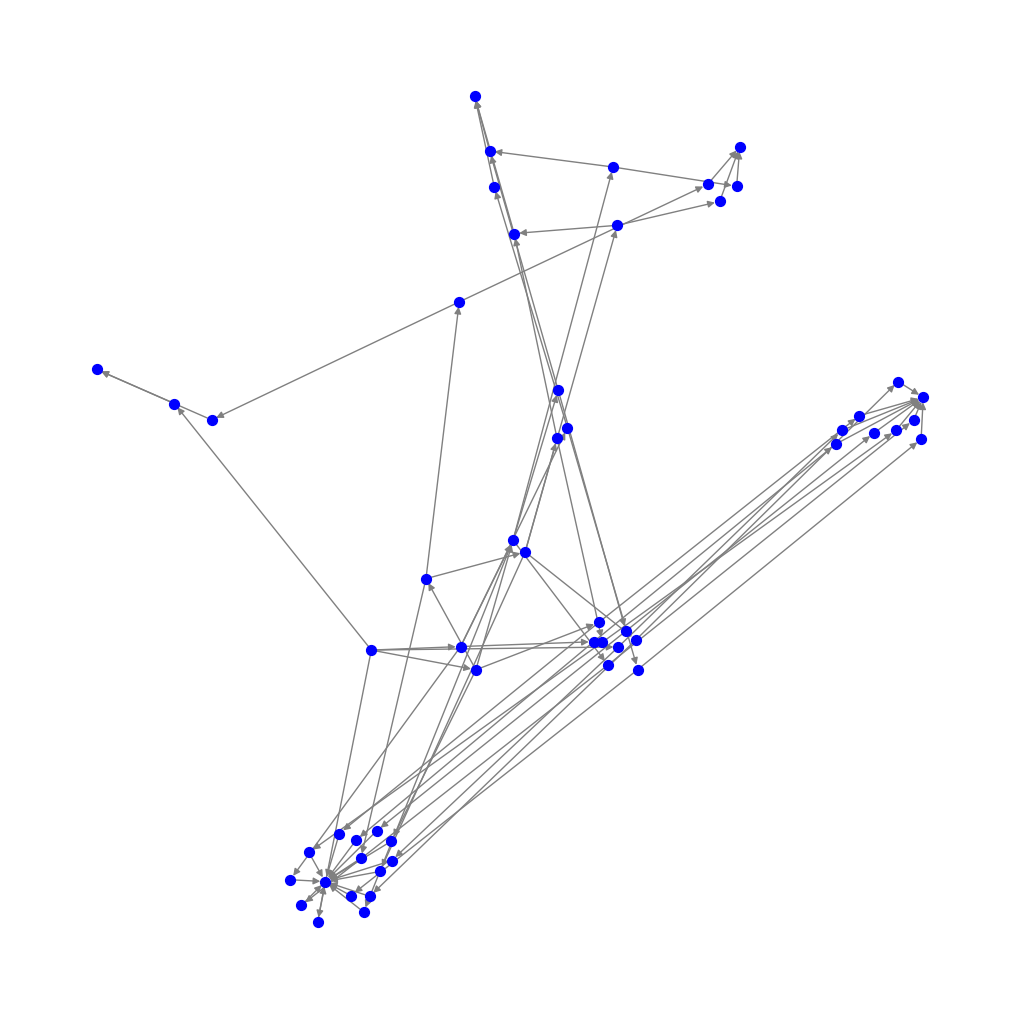

In [230]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(GR)  # You can change this to any other layout, e.g., circular_layout, shell_layout, etc.
nx.draw(GR, pos, with_labels=False, node_size=50, node_color='blue', edge_color='gray')
plt.show()

Now, as we have already a proof of concept for constructing the succession diagram from the model and able to convert them into two matrices 

1. The matrix which indicates the states 
2. The adjacencies matrix 

I want to then find a way to utilize this approach iteratively to the cohort of Boolean models 

In [322]:
def calculate_SD_matrix(GM): 
    # Extract states from GM nodes
    states = [data['states'] for _, data in GM.nodes(data=True) if 'states' in data]

    # Convert to DataFrame
    states_df = pd.DataFrame(states)
    # Convert values to int or logical value
    states_df = states_df.map(lambda x: int(x) if pd.notnull(x) else '*')
    states_df = states_df[list(primes.keys())]
    states_df_strings = states_df.apply(lambda row: ''.join(row.astype(str)), axis=1)
    states_df_dict = pd.Series(list(states_df_strings.astype(str)), index=list(GM.nodes()), ).to_dict()

    # Set the index to the keys
    states_df.index = states_df_strings
    states_df.fillna('*',inplace=True)

    # Create adjacency matrix
    adj_matrix = nx.adjacency_matrix(GM)

    # Convert to DataFrame for better readability
    adj_df = pd.DataFrame(adj_matrix, index=states_df_strings, columns=states_df_strings)

    return(states_df, adj_df)

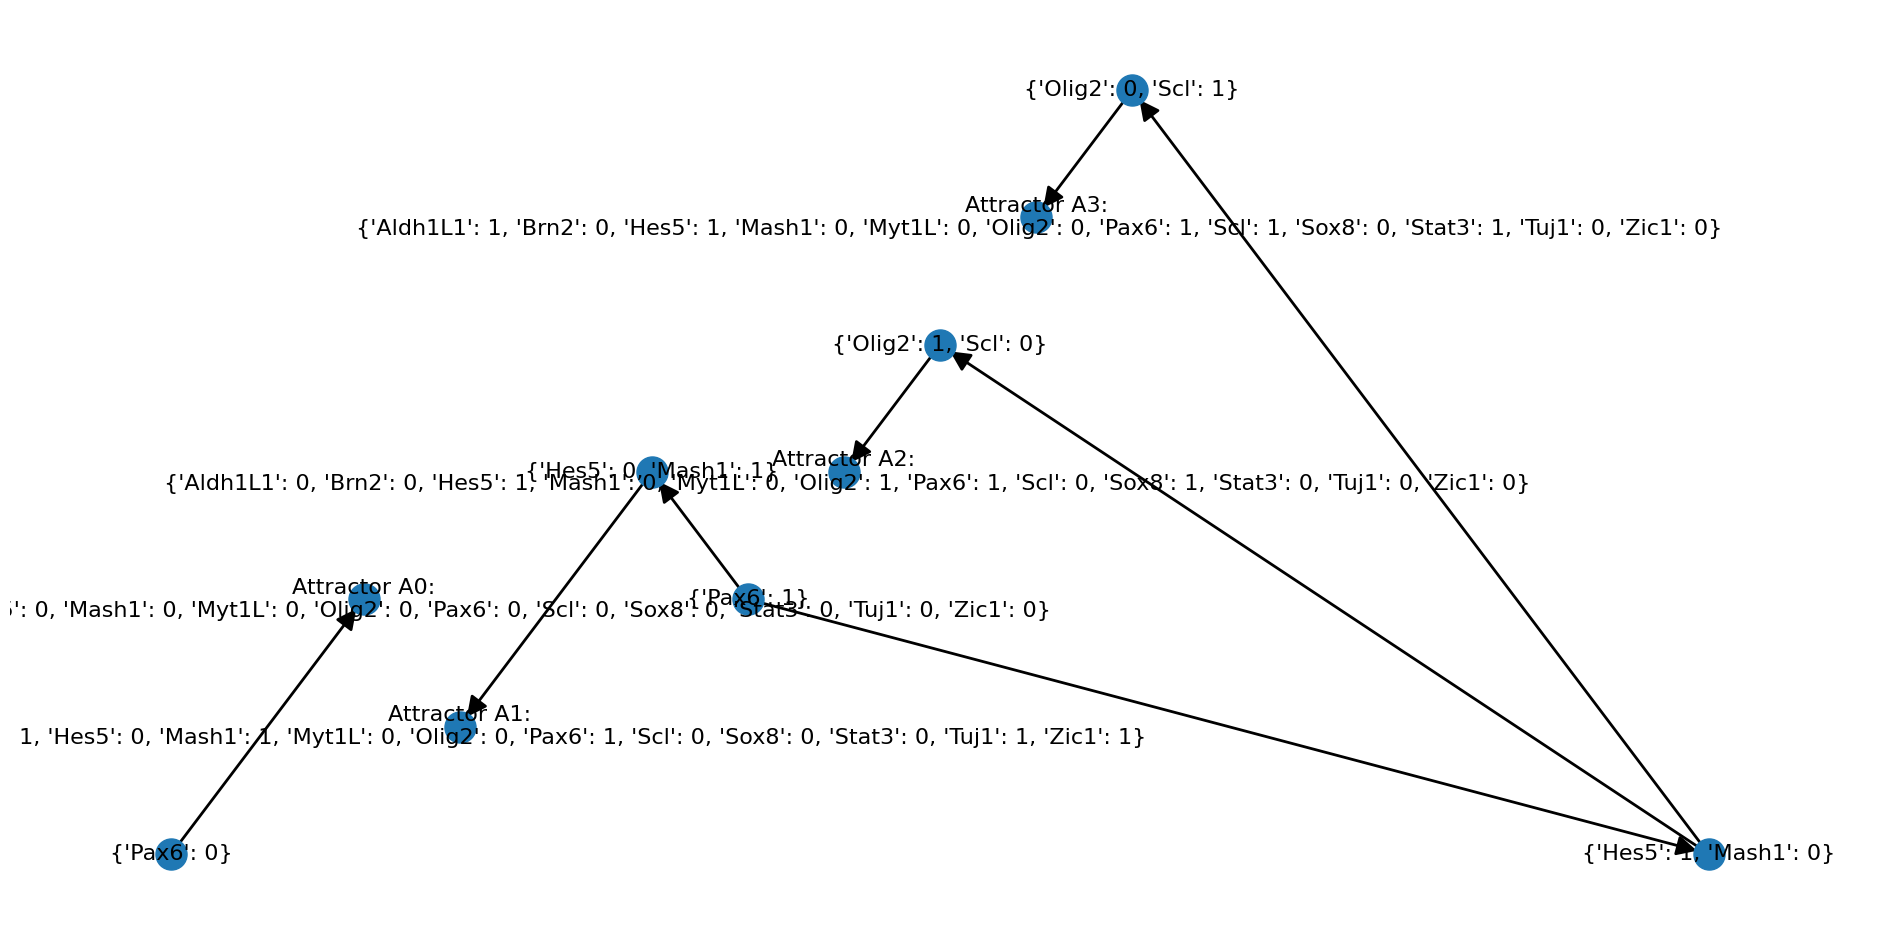

In [331]:
primes = bnet2primes("/home/spankaew/Git/astrologics/models/test_bonesis/bn0.bnet")

# Adjust the simulation size to avoid memory issues
max_simulate_size = 30

# Create the SD network
ar = sm.AttractorRepertoire.from_primes(primes, max_simulate_size=max_simulate_size)
GR=ex.networkx_succession_diagram_motif_based(ar,include_attractors_in_diagram=True)

ex.plot_nx_succession_diagram(GR)
state_1, adj_1 = calculate_SD_matrix(GR)

In [343]:
state_1

,Aldh1L1,Brn2,Hes5,Mash1,Myt1L,Olig2,Pax6,Scl,Sox8,Stat3,Tuj1,Zic1
000000000000,0,0,0,0,0,0,0,0,0,0,0,0
****0*1*****,*,*,*,*,0,*,1,*,*,*,*,*
0101*0*00011,0,1,0,1,*,0,*,0,0,0,1,1
*010******00,*,0,1,0,*,*,*,*,*,*,0,0
0****1*010**,0,*,*,*,*,1,*,0,1,0,*,*
1****0*101**,1,*,*,*,*,0,*,1,0,1,*,*
000000000000,0,0,0,0,0,0,0,0,0,0,0,0
010100100011,0,1,0,1,0,0,1,0,0,0,1,1
001001101000,0,0,1,0,0,1,1,0,1,0,0,0
101000110100,1,0,1,0,0,0,1,1,0,1,0,0


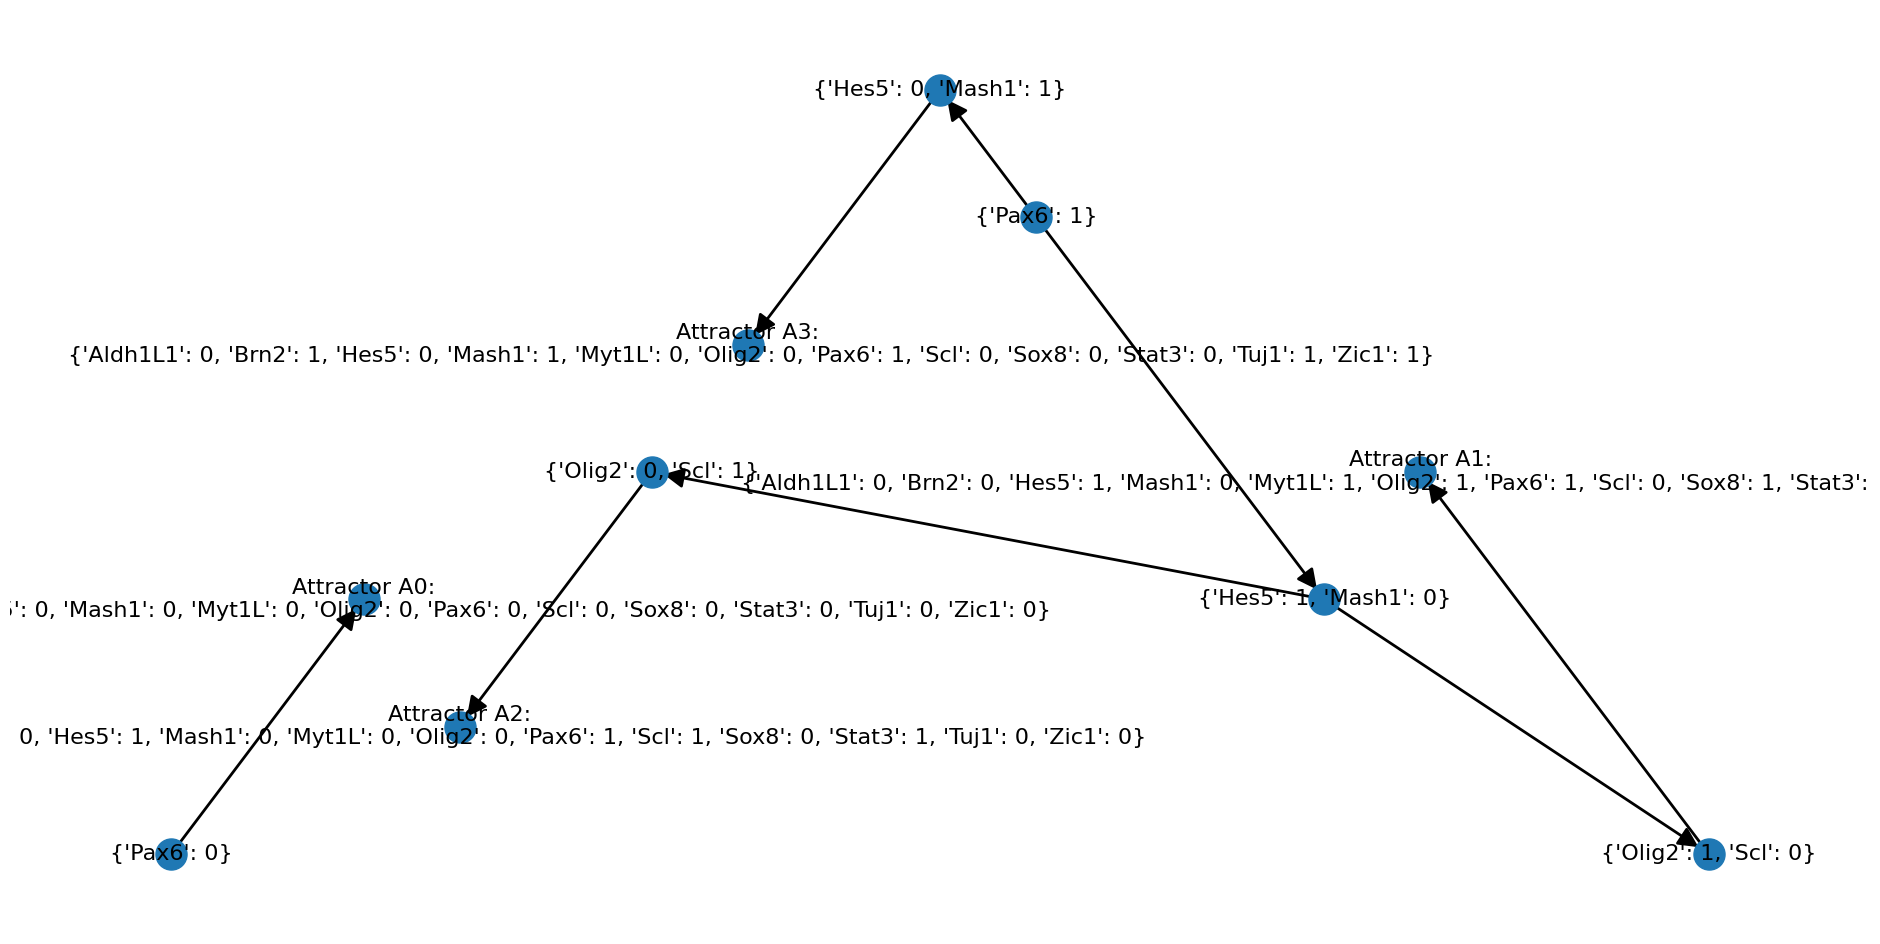

In [332]:
primes = bnet2primes("/home/spankaew/Git/astrologics/models/test_bonesis/bn2.bnet")

# Adjust the simulation size to avoid memory issues
max_simulate_size = 30

# Create the SD network
ar = sm.AttractorRepertoire.from_primes(primes, max_simulate_size=max_simulate_size)
GR=ex.networkx_succession_diagram_motif_based(ar,include_attractors_in_diagram=True)

ex.plot_nx_succession_diagram(GR)
state_2, adj_2 = calculate_SD_matrix(GR)

In [333]:
# Get the list of indices from both dataframes
indices_1 = state_1.index.tolist()
indices_2 = state_2.index.tolist()

# Create a set of unique indices
unique_indices = set(indices_1 + indices_2)

# Create a binary dataframe
binary_df = pd.DataFrame(index=list(unique_indices), columns=['state_1', 'state_2'], data=0)

# Mark the presence of indices in each dataframe
binary_df.loc[indices_1, 'state_1'] = 1
binary_df.loc[indices_2, 'state_2'] = 1

binary_df

,state_1,state_2
010100100011,1,1
0101*0*00011,1,0
010100*00011,0,1
1****0*101**,1,0
****0*1*****,1,0
*010******00,1,1
001011101000,0,1
101000110100,1,1
******1*****,0,1
1***00*101**,0,1


In [334]:
adj_1

,000000000000,****0*1*****,0101*0*00011,*010******00,0****1*010**,1****0*101**,000000000000,010100100011,001001101000,101000110100
000000000000,0,0,0,0,0,0,1,0,0,0
****0*1*****,0,0,1,1,0,0,0,0,0,0
0101*0*00011,0,0,0,0,0,0,0,1,0,0
*010******00,0,0,0,0,1,1,0,0,0,0
0****1*010**,0,0,0,0,0,0,0,0,1,0
1****0*101**,0,0,0,0,0,0,0,0,0,1
000000000000,0,0,0,0,0,0,0,0,0,0
010100100011,0,0,0,0,0,0,0,0,0,0
001001101000,0,0,0,0,0,0,0,0,0,0
101000110100,0,0,0,0,0,0,0,0,0,0


In [335]:
# Reorder adj_1 according to unique_indices and fill NA with 0
adj_1_reordered = adj_1.reindex(index=unique_indices, columns=unique_indices, fill_value=0)

# Reorder adj_2 according to unique_indices and fill NA with 0
adj_2_reordered = adj_2.reindex(index=unique_indices, columns=unique_indices, fill_value=0)

adj_1_reordered, adj_2_reordered

ValueError: cannot reindex on an axis with duplicate labels

In [338]:
import ginsim
import biolqm

lqm = biolqm.load("/home/spankaew/Git/astrologics/models/test_bonesis/bn2.bnet")
lrg = biolqm.to_ginsim(lqm)

ginsim.show(lrg)

In [342]:
fps = biolqm.fixpoints(lqm)
print(len(fps), "fixpoints")
ginsim.show(lrg, fps[3])

4 fixpoints
